#EXP 6

<ipython-input-1-96d1a3167807>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis')


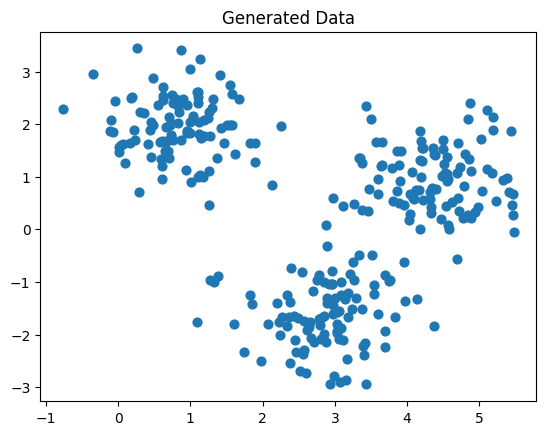

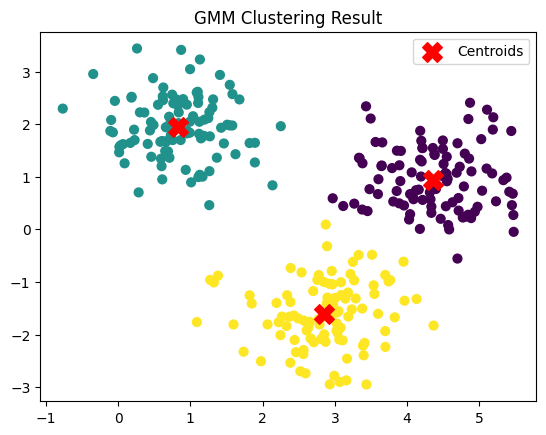

Gaussian Component 1
Mean: [4.35978018 0.94393824]
Covariance Matrix:
 [[0.37684139 0.00065171]
 [0.00065171 0.36932077]]


Gaussian Component 2
Mean: [0.83335473 1.95253705]
Covariance Matrix:
 [[ 0.29963138 -0.02583839]
 [-0.02583839  0.33862817]]


Gaussian Component 3
Mean: [ 2.85597365 -1.61784998]
Covariance Matrix:
 [[0.37625702 0.0297875 ]
 [0.0297875  0.38389149]]




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(42)
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
X = X[:, ::-1]  # swap columns for better plotting

# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis')
plt.title("Generated Data")
plt.show()

# Fit Gaussian Mixture Model using EM algorithm
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# Predict cluster assignments and get means and covariances
labels = gmm.predict(X)
means = gmm.means_
covariances = gmm.covariances_

# Visualize the clustering result
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.scatter(means[:, 0], means[:, 1], marker='X', c='red', s=200, label='Centroids')
plt.title("GMM Clustering Result")
plt.legend()
plt.show()

# Display the means and covariances of the Gaussian components
for i in range(3):
    print(f"Gaussian Component {i+1}")
    print("Mean:", means[i])
    print("Covariance Matrix:\n", covariances[i])
    print("\n")


#EXP 7

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

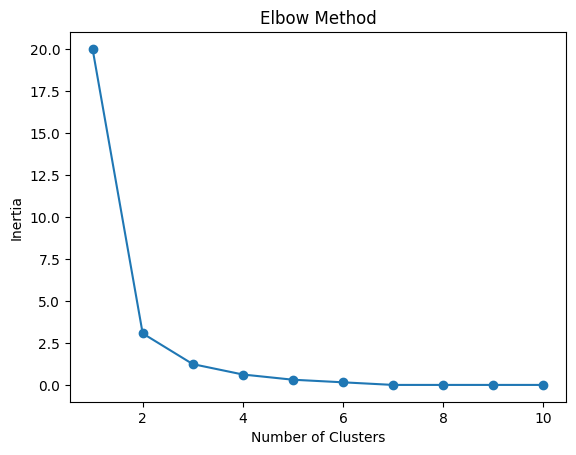

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


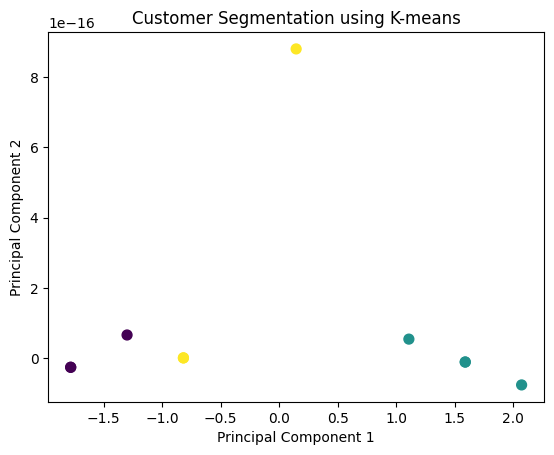

Cluster Centers:
   SpendingScore        Income
0      13.333333  13333.333333
1      80.000000  80000.000000
2      36.666667  36666.666667


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Generate sample data (replace with your dataset)
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'SpendingScore': [50, 30, 80, 10, 90, 20, 70, 10, 80, 30],
    'Income': [50000, 30000, 80000, 10000, 90000, 20000, 70000, 10000, 80000, 30000]
}

df = pd.DataFrame(data)

# Select features for clustering
features = df[['SpendingScore', 'Income']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters (e.g., 3)
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
components = pca.fit_transform(features_scaled)
df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

# Plot the clusters
plt.scatter(df['PC1'], df['PC2'], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segmentation using K-means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['SpendingScore', 'Income'])
print("Cluster Centers:")
print(cluster_centers_df)


#EXP 8

In [3]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163479 sha256=cd0472eba441f07039cdaa044a4c7b7823a438239f7028170ecb69aa351cc527
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [14]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the MovieLens dataset (you can replace it with your own dataset)
data = Dataset.load_builtin('ml-100k')

# Define the reader for the dataset
reader = Reader(line_format='user item rating timestamp', sep='\t', rating_scale=(1, 5))

# Load the dataset and split it into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Use the k-NN collaborative filtering algorithm
sim_options = {'name': 'cosine', 'user_based': False}
algo = KNNBasic(sim_options=sim_options)

# Train the algorithm on the training set
algo.fit(trainset)

# Make predictions on the test set
predictions = algo.test(testset)

# Evaluate the accuracy of the model
accuracy.rmse(predictions)

# Function to get top N recommendations for a user
def get_top_n_recommendations(predictions, n=10):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

print(predictions)

# Get top N recommendations for a specific user (replace 'user_id' with the desired user)
user_id = '907'  # user_id == 907, 371, 605, 796
user_top_n = get_top_n_recommendations(predictions, n=5)[user_id]

# Print the top N recommendations for the user
print(f"Top 5 Recommendations for User {user_id}:")
for item_id, estimated_rating in user_top_n:
    print(f"Item ID: {item_id}, Estimated Rating: {estimated_rating}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0264
[Prediction(uid='907', iid='143', r_ui=5.0, est=4.674038136709815, details={'actual_k': 40, 'was_impossible': False}), Prediction(uid='371', iid='210', r_ui=4.0, est=4.127176061681991, details={'actual_k': 40, 'was_impossible': False}), Prediction(uid='218', iid='42', r_ui=4.0, est=3.55351608506343, details={'actual_k': 40, 'was_impossible': False}), Prediction(uid='829', iid='170', r_ui=4.0, est=3.549641715257212, details={'actual_k': 40, 'was_impossible': False}), Prediction(uid='733', iid='277', r_ui=1.0, est=3.04966392708432, details={'actual_k': 40, 'was_impossible': False}), Prediction(uid='363', iid='1512', r_ui=1.0, est=3.2, details={'actual_k': 40, 'was_impossible': False}), Prediction(uid='193', iid='487', r_ui=5.0, est=3.0459791701944763, details={'actual_k': 40, 'was_impossible': False}), Prediction(uid='808', iid='313', r_ui=5.0, est=4.142678259479501, details={'actual_k': 14, 'was_imp

#EXP 9

In [15]:
!pip install nltk

In [17]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download NLTK resources (if not already downloaded)
nltk.download('vader_lexicon')

def analyze_sentiment(text):
    # Create a SentimentIntensityAnalyzer object
    sia = SentimentIntensityAnalyzer()

    # Get the sentiment scores
    sentiment_scores = sia.polarity_scores(text)

    # Interpret the compound score to determine sentiment
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Example usage
text_to_analyze1 = "I love this product! It's amazing."
sentiment_result1 = analyze_sentiment(text_to_analyze1)

text_to_analyze2 = "I hate this product! It's worst."
sentiment_result2 = analyze_sentiment(text_to_analyze2)

print(f"Sentiment for example 1: {sentiment_result1}")
print(f"Sentiment for example 2: {sentiment_result2}")

Sentiment for example 1: Positive
Sentiment for example 2: Negative


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
